<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    Introduction To Data Science 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data Modelling With Deep Learning 📌
</div>

# Importing relevant libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

2023-12-08 21:35:47.535596: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-08 21:35:47.561358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 21:35:47.561380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 21:35:47.562030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 21:35:47.566566: I tensorflow/core/platform/cpu_feature_guar

In [2]:
raw_data = np.loadtxt('../../data/processed/scaled_encoded_data.csv', delimiter = ',',skiprows=1)

# goals and assists columns
inputs = np.delete(raw_data, [6, 7], axis=1)
targets = raw_data[:,[6,7]]
print(f"Data shape: {raw_data.shape}")
print(f"Inputs shape: {inputs.shape}")
print(f"Targets shape: {targets.shape}")

Data shape: (3320, 40)
Inputs shape: (3320, 38)
Targets shape: (3320, 2)


# Preprocessing

## Shuffle data

In [3]:
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible

shuffled_indices = np.arange(inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = inputs[shuffled_indices]
shuffled_targets = targets[shuffled_indices]

## Split the dataset into train, validation, and test

In [4]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count


# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]


# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

## Save the three datasets in *.npz

In [5]:
np.savez('../../data/data_npz_format/data_train', inputs=train_inputs, targets=train_targets)
np.savez('../../data/data_npz_format/data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('../../data/data_npz_format/data_test', inputs=test_inputs, targets=test_targets)

# Create machine learning algorithm

## Load data

In [6]:
npz = np.load('../../data/data_npz_format/data_train.npz')

train_inputs,train_targets = npz['inputs'].astype(np.float64) , npz['targets'].astype(np.float64)

npz = np.load('../../data/data_npz_format/data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('../../data/data_npz_format/data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.float64)

## Model

In [7]:
output_size = 2
hidden_layer_size = 200

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), #3rd hidden layer
    tf.keras.layers.Dense(output_size, activation='linear') # output layer
])

# choosing optimizer and loss function
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

# fit the model
history = model.fit(train_inputs, 
                    train_targets,
                    batch_size=batch_size, 
                    epochs=max_epochs,
                    callbacks=[early_stopping], 
                    validation_data=(validation_inputs, validation_targets),
                    verbose = 2 
                    )  

Epoch 1/100
27/27 - 1s - loss: 0.8160 - accuracy: 0.6615 - val_loss: 0.2175 - val_accuracy: 0.7139 - 607ms/epoch - 22ms/step
Epoch 2/100
27/27 - 0s - loss: 0.2418 - accuracy: 0.7688 - val_loss: 0.1440 - val_accuracy: 0.8072 - 70ms/epoch - 3ms/step
Epoch 3/100
27/27 - 0s - loss: 0.1072 - accuracy: 0.8343 - val_loss: 0.1160 - val_accuracy: 0.7922 - 70ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 0.0874 - accuracy: 0.8411 - val_loss: 0.0594 - val_accuracy: 0.8705 - 64ms/epoch - 2ms/step
Epoch 5/100
27/27 - 0s - loss: 0.0525 - accuracy: 0.8739 - val_loss: 0.0509 - val_accuracy: 0.9157 - 56ms/epoch - 2ms/step
Epoch 6/100
27/27 - 0s - loss: 0.0390 - accuracy: 0.8976 - val_loss: 0.0381 - val_accuracy: 0.9187 - 55ms/epoch - 2ms/step
Epoch 7/100
27/27 - 0s - loss: 0.0333 - accuracy: 0.9010 - val_loss: 0.0375 - val_accuracy: 0.9096 - 55ms/epoch - 2ms/step
Epoch 8/100
27/27 - 0s - loss: 0.0337 - accuracy: 0.8791 - val_loss: 0.0332 - val_accuracy: 0.9157 - 56ms/epoch - 2ms/step
Epoch 9/100
27

## Evaluate

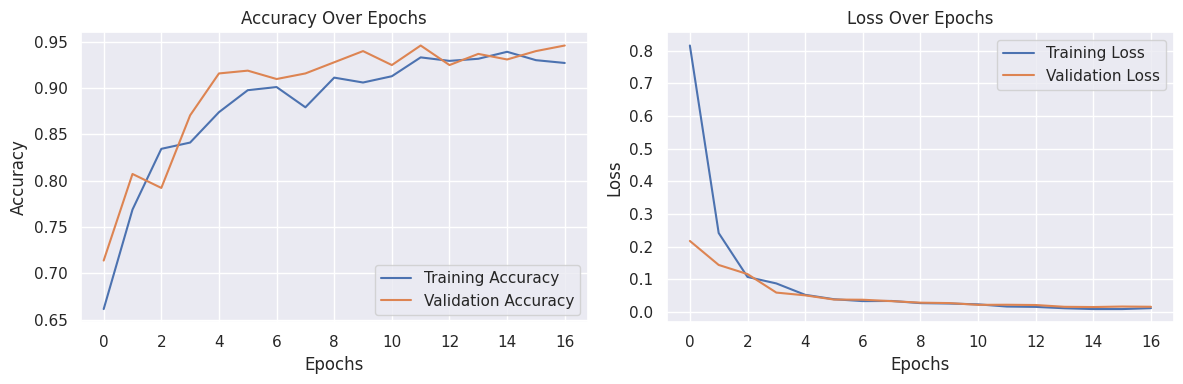

In [8]:
sns.set()
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

11/11 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9428


In [10]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.02. Test accuracy: 94.28%
